In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline


'%.3f'

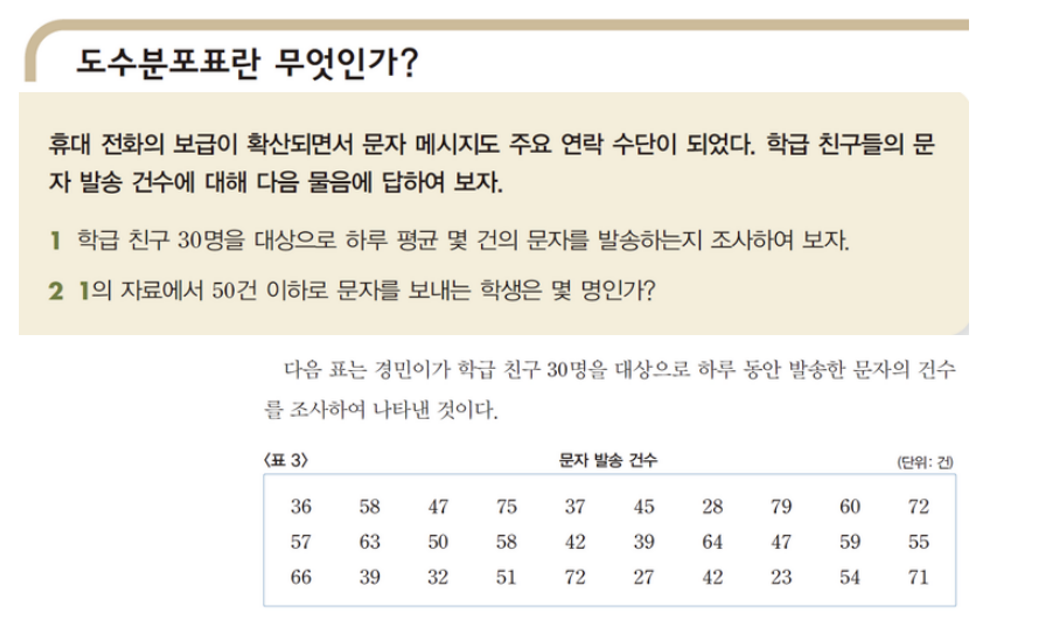
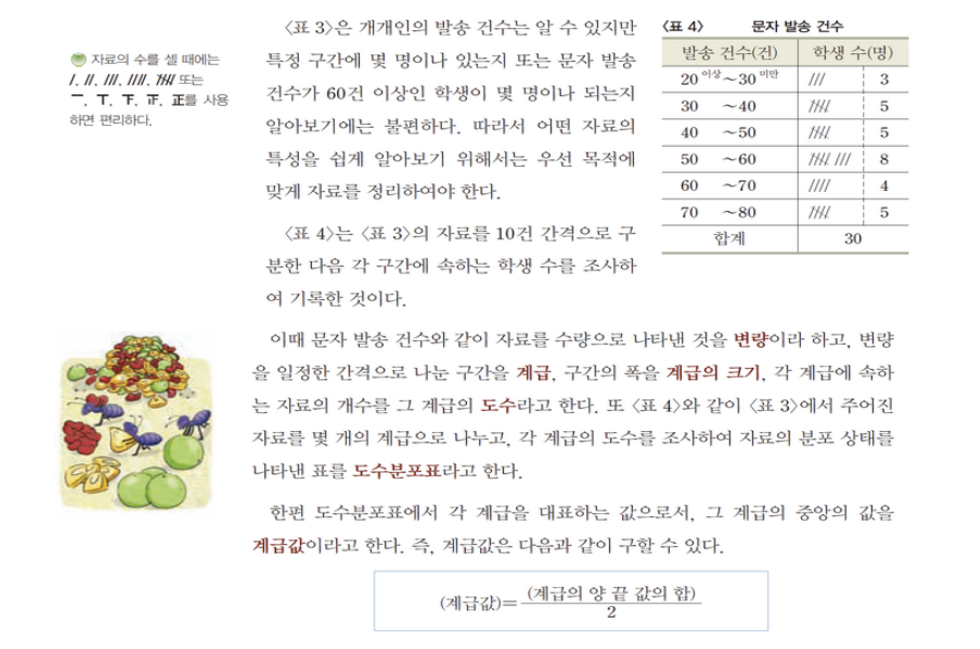


### 도수분포표란?

- 분할된 구간과 데이터의 개수를 표로 정리한 것

In [4]:
pwd

'/Users/Kimseunghyun/KDT/Python Learning/day15'

In [5]:
df = pd.read_csv('../../DB_work/csv/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
# 50명의 영어 점수 array
# df['english']
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

##### 영어 점수 도수 분포표 생성

- 각 빈도는 histogram() 를 통해 얻어옴
 
numpy.histogram(a,<br>
　　　　　　　　　bins= 10,<br>
　　　　　　　　　range= None,<br>
　　　　　　　　　density= None) 

- a	히스토그램을 계산하기위한 입력 데이터
- bins	bins가 정수이면 동일한 간격의 bins수를 나타냄
- range	bins의 상한과 하한 범위 범위가 지정되지 않으면[a.min(), a.max()]가 범위
- density	부울 매개 변수 값이 True이면 빈도를 계산하는 대신 확률을 계산

- 반환 값
    - hist와bin_edges의 두 배열을 반환
        - 배열 hist는 히스토그램의 값을 표시
        - bin_edges는 계급
            - bin_edges의 크기는 항상 1 + (hist 크기) 즉length(hist) + 1

In [7]:
freq, e = np.histogram(english_scores, bins=10, range=(0,100))
freq
e


array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [8]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
# 도수 분포표
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


### 계급값

- 각 계급을 대표하는 값으로 계급의 중앙값을 이용
- 60~70의 계급이면 계급값은 65 점

In [9]:
class_value = [(i + (i+10)) for i in range(0,100,10) ]
class_value

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190]

### 상대도수

- 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도 비율을 차지하고 있는지를 나타냄


In [10]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

### 누적 상대도수
- 해당 계급 까지의 상대도수의 합
- 누적합 : np.cumsum()

In [11]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [12]:
#도수 분포를 확장 
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',

'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,10,0,0.00,0.00
10~20,30,0,0.00,0.00
20~30,50,0,0.00,0.00
30~40,70,2,0.04,0.04
40~50,90,8,0.16,0.20
50~60,110,16,0.32,0.52
60~70,130,18,0.36,0.88
70~80,150,6,0.12,1.00
80~90,170,0,0.00,1.00


### 도수분포표의 최빈값

- 최대가 되는 계급의 계급값 => 60-70인 계급의 도수가 최대

##### 판다스 데이터프레임의 idxmax() idxmin() 함수

- pandas.DataFrame.idxmax()의 구문 :
    - DataFrame.idxmax()최대 값의 인덱스를 찾는 방법 행 단위
    - DataFrame.idxmax()메서드를 사용하여 열 단위로 최대 값 인덱스 찾기
- DataFrame.idxmax(axis=0,skipna=True)

- axis: 정수 또는 문자열 유형 매개 변수 사용할 축을 지정행의 경우 0 또는index, 열의 경우 1 또는columns
- skipna: 부울 매개 변수로 이 매개 변수는 널값 제외를 지정  전체 행 또는 열이 널이면 결과는 NA가 됨
- 반환 값 : 지정된 축을 따라 최대 값의 인덱스를 포함하는Series를 반환

In [20]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
print("The Original Data frame is: \n")
print(dataframe)

series = dataframe.idxmax()
print("The Indexes are: \n")
print(series)

The Original Data frame is: 

   Attendance  Obtained Marks
0          60              90
1         100              75
2          80              82
3          78              64
4          95              45
The Indexes are: 

Attendance        1
Obtained Marks    0
dtype: int64


### 도수 분포표 최빈 값

- 히스토그램
    - 수치형 변수의 분포를 확인할 때 주로 사용
    - 2개의 그룹의 히스토그램을 겹쳐 그려서 비교 가능
- box plot
    - 3개 이상의 그룹의 비교에서 전반적인 분포 비교에 활용
    - 그룹의 개수와 상관없이 상자그림을 나란하게 그려서 표현


**2 개의 그룹의 히스토그램을 겹쳐 그려서 비교 하기**

In [21]:
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,10,0,0.00,0.00
10~20,30,0,0.00,0.00
20~30,50,0,0.00,0.00
30~40,70,2,0.04,0.04
40~50,90,8,0.16,0.20
50~60,110,16,0.32,0.52
60~70,130,18,0.36,0.88
70~80,150,6,0.12,1.00
80~90,170,0,0.00,1.00


In [25]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']
freq_dist_df.loc[freq_dist_df['frequency'].idxmin(),'class value']

130

10

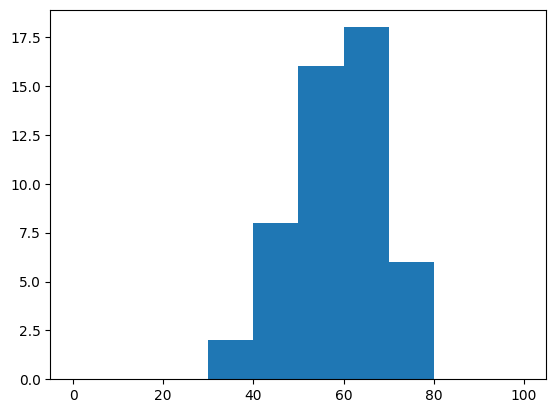

In [23]:
#영어 점수를 시각화 해보자.
english_scores
plt.hist(english_scores, bins=10, range=(0,100));b
# 수치형 변수를 분포화할때(1~2개 그룹)

<AxesSubplot: >

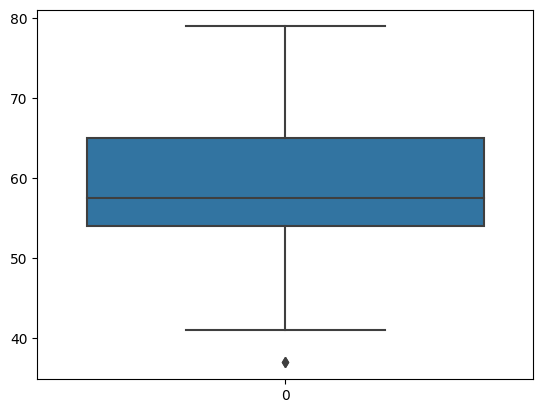

In [26]:
import seaborn as sns
sns.boxplot(english_scores) # 3개 이상의 그룹의 분포비교

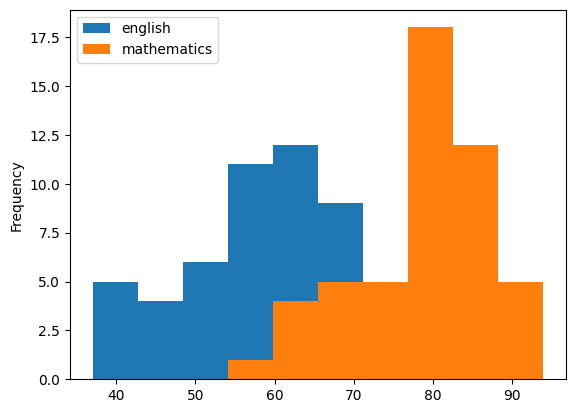

In [28]:
df.plot(kind = 'hist');

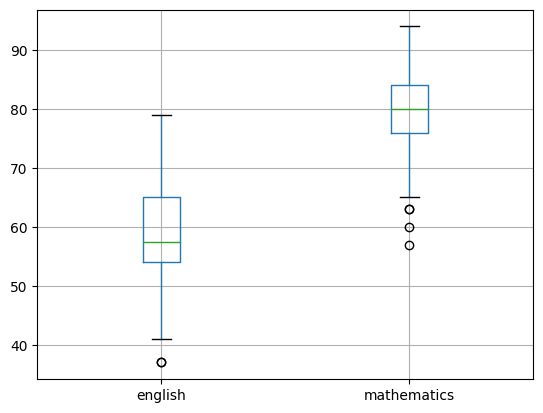

In [29]:
df.boxplot();

#### 백분위수 및 사분위수 계산

In [14]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [31]:
print(np.percentile(x,10)) # 백분위수
print(np.quantile(x,0.1))  # 사분위수

2.0
2.0


In [33]:
print(np.percentile(x,25)) # 백분위수
print(np.quantile(x,0.25))  # 사분위수

6.0
3.5


## 모양 통계량(분포의 모양)

### 왜도(skewness)

- 데이터의 비대칭도
- 분포 모양이 대표값(예. 평균)을 중심으로 좌우의 모양이 대칭적인가 아닌가를 측정
- 데이터가 한쪽 방향으로 얼마나 치우쳐져 있는가를 나타냄 
- 특징
    - 왜도가 0에 가까운 값을 가지면 분포의 모양은 좌우 대칭
    - 왜도가 음수로 나타나면 오른쪽으로 치우친 분포(왼쪽 꼬리분포) 모양 
    
    ![](왜도.png)


#### 왜도 계산
- 분포의 비대칭도
- 왜도가 0이면 정규분포
- 왜도의절대값이 1.5 이상이면 많이 치우쳤다고 봄

In [64]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [65]:
print(x1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


<AxesSubplot: >

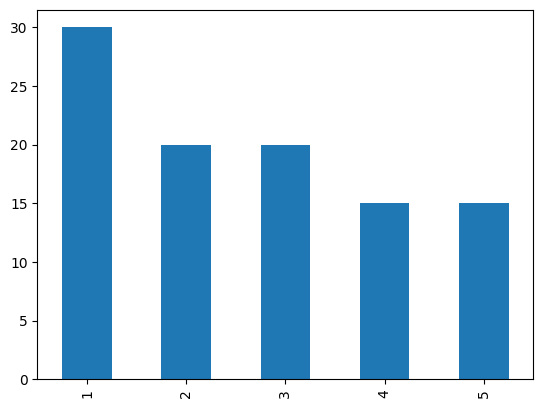

In [52]:
pd.Series(x1).value_counts(sort=False).plot(kind = 'bar')

<AxesSubplot: >

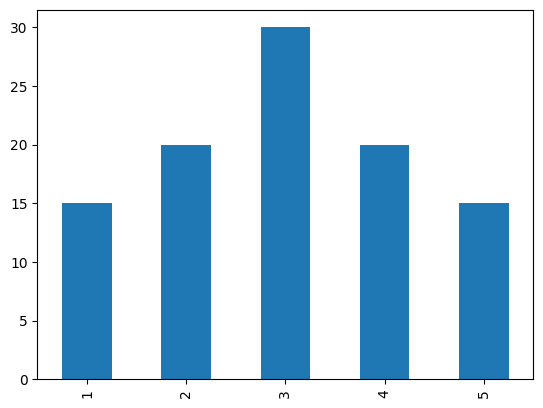

In [53]:
pd.Series(x2).value_counts(sort=False).plot(kind = 'bar')

<AxesSubplot: >

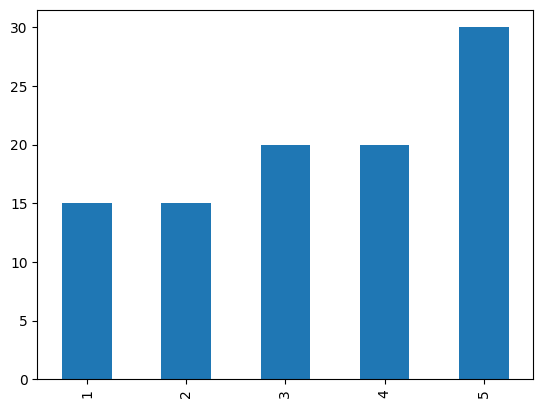

In [66]:
pd.Series(x3).value_counts(sort=False).plot(kind = 'bar')

In [67]:
print("왜도:",skew(x1))
print("왜도:",skew(x2))
print("왜도:",skew(x3))

왜도: 0.3192801008486361
왜도: 0.0
왜도: -0.31928010084863606


### 첨도(kurtosis)


- 데이터의 뽀족한 정도
- 분포가 대표값을 중심으로 얼마나 모여 있는가를 나타내는 척도
- 정규분포(첨도=3)를 기준으로 비교
    - 데이터가 대푯값을 중심으로 상당히 많이 몰려 있다면 분포 가운데 모양이 뾰족한 모양(첨도>3)으로 나타남
    - 데이터가 대표값을 중심으로 좌우에 퍼져 있다면 가운데 모양은 완만(첨도<3) 
    
![](첨도.png)


#### 첨도 계산

In [58]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

In [59]:
pd.Series(x1).value_counts(sort=False)

1    20
2    20
3    20
4    20
5    20
dtype: int64

<AxesSubplot: >

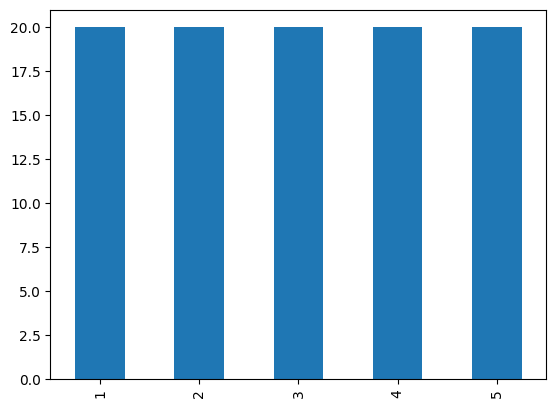

In [60]:
pd.Series(x1).value_counts(sort=False).plot(kind = 'bar')

<AxesSubplot: >

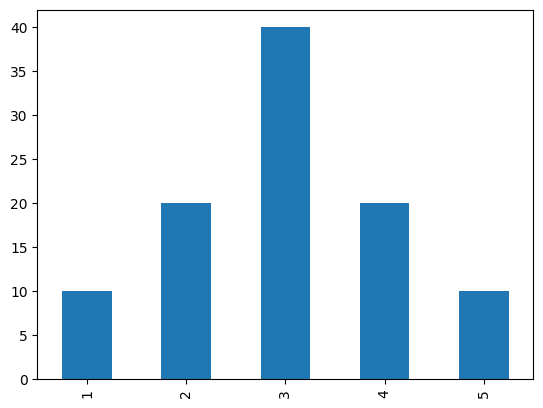

In [61]:
pd.Series(x2).value_counts(sort=False).plot(kind = 'bar')

<AxesSubplot: >

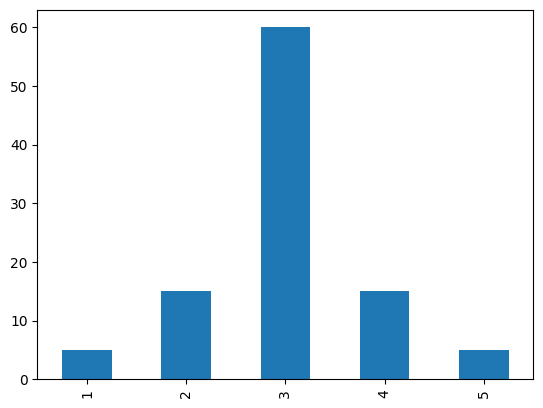

In [62]:
pd.Series(x3).value_counts(sort=False).plot(kind = 'bar')

In [63]:
print("첨도:",kurtosis(x1))
print("첨도:",kurtosis(x2))
print("첨도:",kurtosis(x3))

첨도: -1.3
첨도: -0.5
첨도: 0.8775510204081636
